## Broyden方法

In [2]:
import numpy as np

In [21]:
def broyden(f, x0=np.ones([1, 2]), j0=np.random.random([2, 2]), num_epochs=100, tol=1e-10):
    j = j0
    x = np.ones([num_epochs, 2])
    for k in range(num_epochs-1):
        if np.isfinite(np.linalg.cond(j)) == 0:
            print("Please reconsider initial Jacobian matrix")
            break
        x_change = -np.linalg.inv(j) @ f(x[k])
        f_change = f(x[k] + x_change) - f(x[k])
        x[k+1] = x[k] + x_change  # 迭代公式      
        a = ((f_change - j @ x_change) / np.linalg.norm(x_change)**2 ).reshape(-1, 1)
        b = x_change.reshape(-1, 1).T
        j_change = a @ b
        j = j + j_change  # 迭代更新Jacobian矩阵
        
        if sum(abs(f(x[k+1]))) < tol:
            print("The number of iteration: {}".format(k + 1))
            break            
    
    return x[k+1], x[0: k+1] 

## 给定$f(x,y)=\bigg[\begin{matrix} y-x^3-2x^2+1 \\ y +x^2-1\end{matrix}\bigg]$, 找到$\vec x^*$ 使得 $f(\vec x^*)=\vec 0$

In [13]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

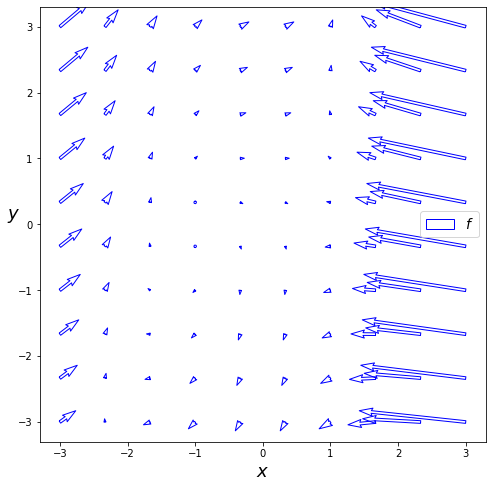

In [5]:
X = np.linspace(-3, 3, 10)
Y = np.linspace(-3, 3, 10)
X, Y = np.meshgrid(X, Y)
X1 = Y - X**3 - 2 * X**2 + 1
X2 = Y + X**2 - 1

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
ax.quiver(X, Y, X1, X2, edgecolor='b', facecolor='None', linewidth=1, label="$f$")
ax.set_xlabel("$x$", fontsize=18)
ax.set_ylabel("$y$", rotation=0, fontsize=18)
ax.legend(fontsize=14)
plt.show()

In [18]:
f = lambda X: np.array([X[1] - X[0]**3 - 2 * X[0]**2 + 1, X[1] + X[0]**2 - 1])

In [22]:
root, root_lst = broyden(f, x0=np.array([1, 1]), 
                      j0=np.array([[2, 1], [1, 1]]))
root

The number of iteration: 12


array([0.73205081, 0.46410162])

### 迭代过程

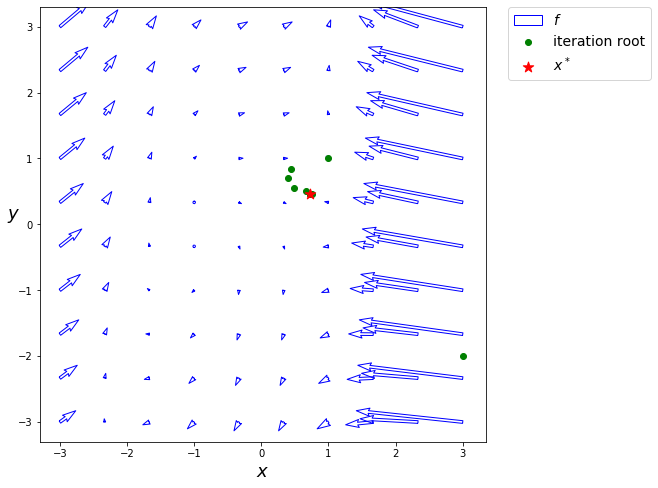

In [23]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
ax.quiver(X, Y, X1, X2, edgecolor='b', facecolor='None', linewidth=1, label="$f$")
for i, r in enumerate(root_lst[0:-1]):
    ax.scatter(r[0], r[1], color='g')
    if i == len(roots[0:-1]) -1 :
        ax.scatter(r[0], r[1], color='g', label="iteration root")
ax.scatter(root[0], root[1], marker='*', color='red', s=120, label="$x^*$")
ax.set_xlabel("$x$", fontsize=18)
ax.set_ylabel("$y$", rotation=0, fontsize=18)
ax.legend(loc=2, fontsize=14, bbox_to_anchor=(1.05,1.0),borderaxespad=0.)  
plt.show()

### 条件数

In [24]:
def f_jacobian(X):
    return np.array([[-3 * X[0]**2 - 4 * X[0], 1], [2 * X[0], 1]])
conditon = 1 / np.linalg.norm(f_jacobian(root))
conditon

0.20113776490611548

### 使用 `Scipy`

In [25]:
from scipy import optimize

root = optimize.broyden1(f, xin=[1, 1], alpha=-1)
root

array([0.73205081, 0.46410161])